In [1]:
library(tibble);library(dplyr);library(ggplot2);library(readr)
library(scales); library(grid); library(RColorBrewer);library(png)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:tibble’:

    as_data_frame, data_frame, data_frame_, frame_data, glimpse,
    knit_print.trunc_mat, tibble, trunc_mat, type_sum

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘scales’

The following objects are masked from ‘package:readr’:

    col_factor, col_numeric



In [2]:
fte_theme <- function() {
      
    # Generate the colors for the chart procedurally with RColorBrewer
    palette <- brewer.pal("Greys", n=9)
    color.background = palette[1]
    color.grid.major = palette[3]
    color.grid.minor = palette[2]
    color.axis.text = palette[6]
    color.axis.title = palette[7]
    color.title = palette[9]

    # Begin construction of chart
    theme_bw(base_size=9) +

    # Set the entire chart region to a light gray color
    theme(panel.background=element_rect(fill=color.background, color=color.background)) +
    theme(plot.background=element_rect(fill=color.background, color=color.background)) +
    theme(panel.border=element_rect(color=color.background)) +

    # Format the grid
    theme(panel.grid.major=element_line(color=color.grid.major,size=.25)) +
    theme(panel.grid.minor=element_blank()) +
    theme(axis.ticks=element_blank()) +

    # Format the legend, but hide by default
    theme(legend.position="bottom") +
    theme(legend.background = element_rect(fill=color.background)) +
    theme(legend.text = element_text(size=7,color=color.axis.title)) +

    # Set title and axis labels, and format these and tick marks
    theme(plot.title=element_text(color=color.title, size=10, vjust=1.25)) +
    theme(axis.text.x=element_text(size=7,color=color.axis.text)) +
    theme(axis.text.y=element_text(size=7,color=color.axis.text)) +
    theme(axis.title.x=element_text(size=8,color=color.axis.title, vjust=0)) +
    theme(axis.title.y=element_text(size=8,color=color.axis.title, vjust=1.25)) +
    
    # Set facet attributes
    theme(strip.background = element_rect(fill=color.background, colour = color.background)) +
    theme(strip.text = element_text(size = 15, colour = color.axis.text)) +

    # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
    
}

In [3]:
df <- read_csv('Data/neander_total.csv')
tb <- as_tibble(df)

In [4]:
tb <- rename(tb, cramers_v = `cramer's v` ,  low_ci = l.ci,  up_ci = u.ci, chi_square = `chi square`)


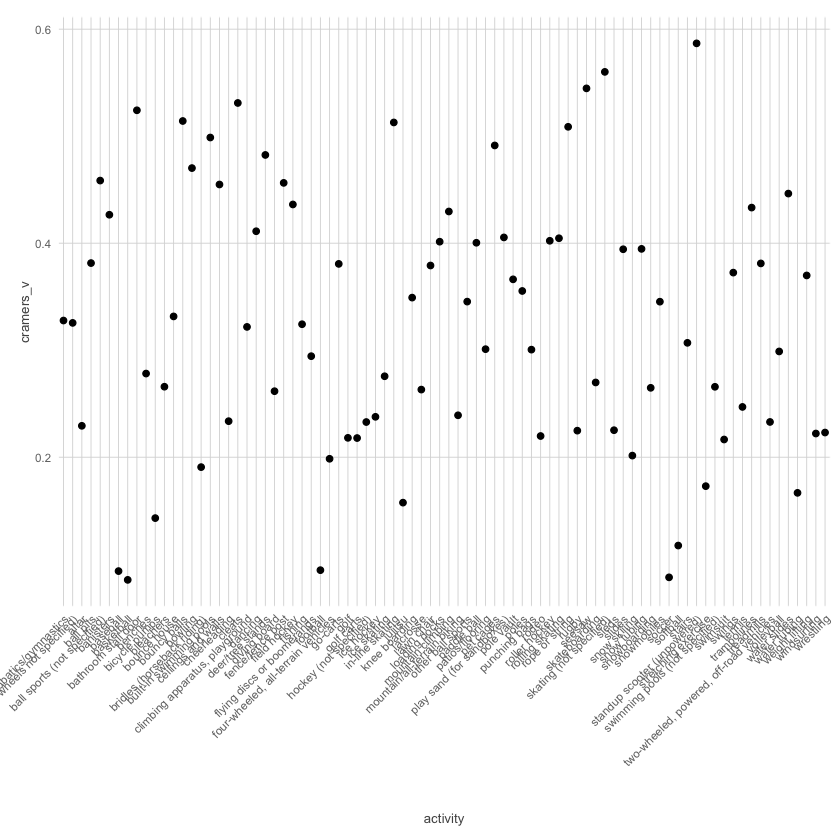

In [5]:
tb%>%
    arrange(cramers_v) %>%
    ggplot(aes(x = activity, y = cramers_v)) + geom_point() + fte_theme() +   theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [9]:
img <- readPNG("images/neander_tubing.png")
g <- rasterGrob(img, interpolate=TRUE)

,activity,cramers_v,low_ci,up_ci,chi_square,p-value
1,altar,0.22934763,0,0.27958633,3.576822816,0.733722288
2,banisters,0.426585006,0,0.551900791,11.10046079,0.085320753
3,benches,0.278182553,0,0.362166153,8.976721833,0.174891457
4,bleachers,0.265893759,0,0.344154559,10.95842113,0.089670009
5,diving board,0.261694057,0,0.34134938,7.396248196,0.285750714
6,flying discs or boomerangs,0.294419248,0,0.380575849,11.35543283,0.077993203
7,golf,0.218105345,0,0.281538417,11.74977561,0.067789542
8,golf carts,0.217917597,0,0.282950127,9.97249664,0.125815034
9,lawn chair,0.379153379,0,0.491286091,10.63803906,0.100228447
10,loading docks,0.401409029,0,0.517849797,11.92356143,0.063695941


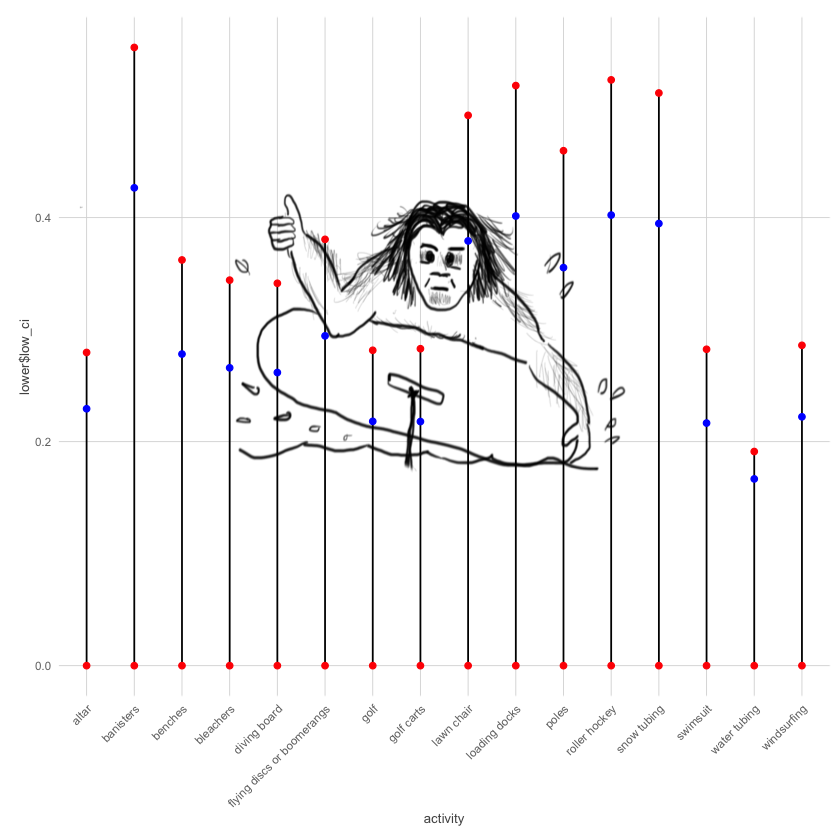

In [10]:
lower <-
tb%>%
filter(`p-value` >= .05)

lower

lower %>%
ggplot(aes(x = activity))+ 
annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) + # add a photo
geom_segment(aes(x = activity,y = lower$low_ci,xend = activity,yend = lower$up_ci),size = .5)+
geom_point(aes(y = cramers_v), colour = "blue") +
geom_point(aes(y = low_ci), colour = "red") +
geom_point(aes(y = up_ci), colour = "red") +
fte_theme() +   theme(axis.text.x = element_text(angle = 45, hjust = 1))


  #geom_point(aes(y = up_ci), colour = "red"))
#lower %>%
#ggplot(aes(x = activity)) +  
 # geom_point(aes(y = cramers_v), colour = "blue") + 
  #geom_point(aes(y = low_ci), colour = "red") +
  #geom_point(aes(y = up_ci), colour = "red") +
  #geom_segment(aes(x = activity,y = tb$low_ci,xend = activity,yend = tb$up_ci),size = 1)+
  #fte_theme() +   theme(axis.text.x = element_text(angle = 45, hjust = 1))